<a href="https://colab.research.google.com/github/PMatthaei/project-thesis-pymarl-results/blob/master/visualize_pymarl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PMatthaei/project-thesis-pymarl-results.git

Cloning into 'project-thesis-pymarl-results'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 284 (delta 45), reused 279 (delta 40), pack-reused 0
Receiving objects: 100% (284/284), 21.74 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (45/45), done.


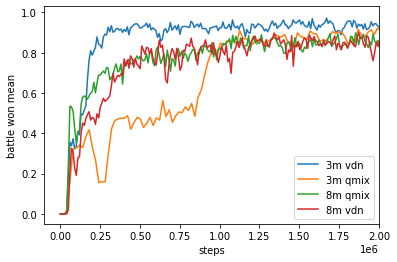

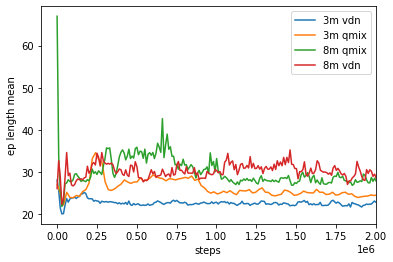

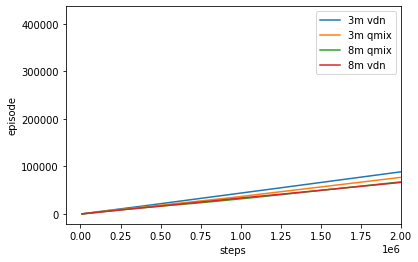

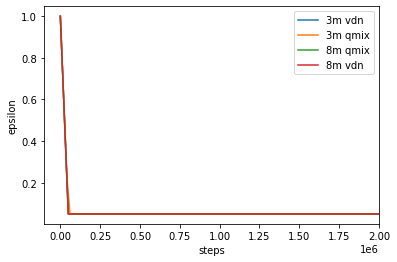

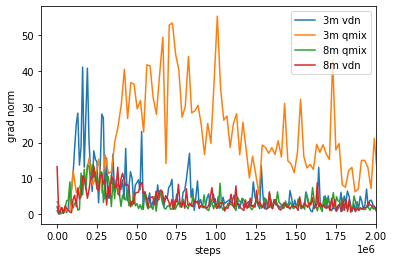

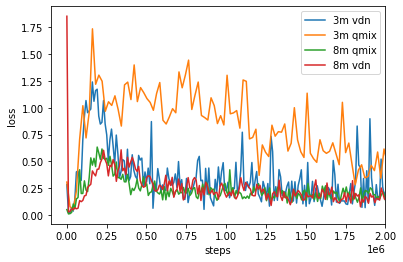

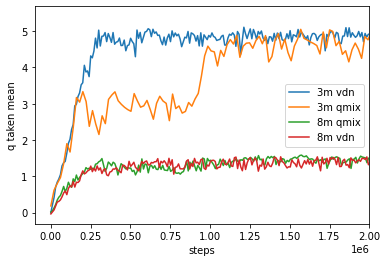

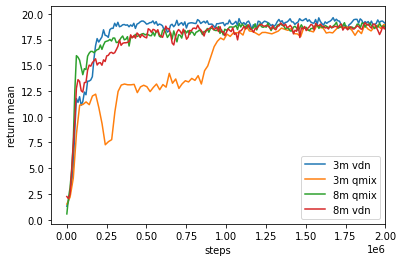

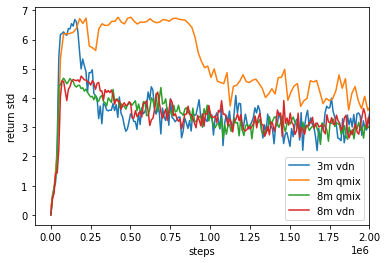

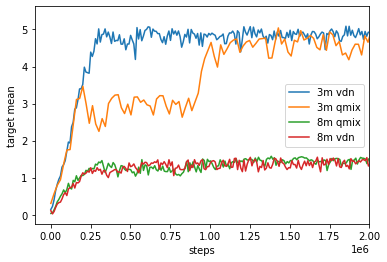

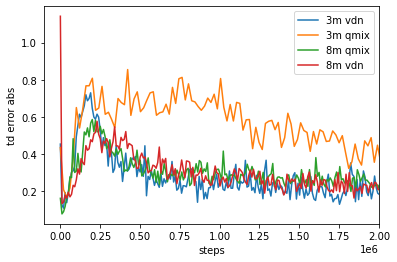

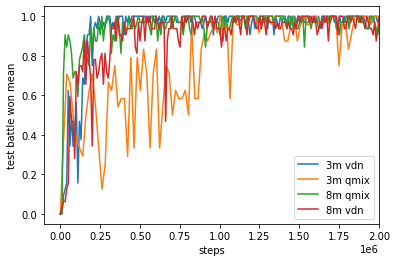

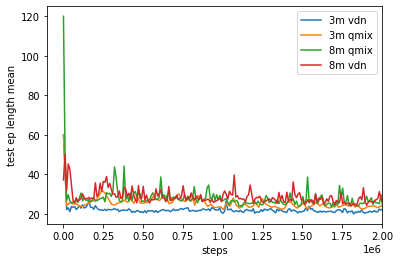

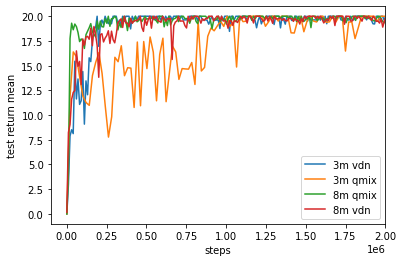

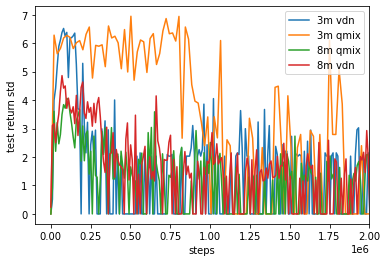

<Figure size 432x288 with 0 Axes>

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import re

from pathlib import Path

plot_data = {}
metrics = []

def extract_plot_data(algos=[], envs=[]):
  for path in Path('/content/project-thesis-pymarl-results').rglob('*info*.json'):
    label = extract_label(path, algos+envs)

    if is_algo(path, algos) and is_env(path, envs):
      with open(path) as json_file:
          data = json.load(json_file)
          for metric in data:
            if '_T' not in metric:

              if metric not in metrics:
                metrics.append(metric)

              transposed_identifier = metric+'_T'
              xs = data[transposed_identifier]
              ys = data[metric]

              if metric in plot_data:
                plot_data[metric].append((xs, ys, label))
              else:
                plot_data[metric] = []
                plot_data[metric].append((xs, ys, label))

def plot():
  for metric in metrics:
    for i, data in enumerate(plot_data[metric]):
      plt.plot(data[0], data[1], label=data[2])
      plt.xlabel('steps')
      metric_label = metric.replace('_', ' ')
      plt.xlim(right=2000000)
      plt.ylabel(metric_label)
    plt.legend(loc='best')
    plt.show()
    plt.savefig(metric+'.png')

def is_env(path, envs):
  if len(envs) == 0:
    return True

  return any(env in str(path) for env in envs)

def is_algo(path, algos):
  if len(algos) == 0:
    return True

  return any(algo in str(path) for algo in algos)

def extract_label(path, search):
  return re.search(".*(results/)(.*)(/source).*",str(path))[2]


extract_plot_data(algos=['vdn', 'qmix'], envs=['3m', '8m'])
plot()